<center> # Naiwny klasyfikator bayesowski</center>

Celem ćwiczenia jest zapoznanie się z technikami konstrukcji naiwnego klasywikatora bayesowskiego. 

Ćwiczenie oparte jest o artykuł z [linku](https://www.kaggle.com/prashant111/naive-bayes-classifier-in-python/notebook)

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split

Na początku proszę wczytać plik __data.csv__ używając jako separatora ',':

In [2]:
df = pd.read_csv("data.csv", sep=",")
df

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


W następnie sprawdź które z kolumn zawierają dane tekstowe lub liczbowe. W tym celu sprawdź wartość  argumentu *dtype* z odpowiednim warunkiem:

In [3]:
categorical = df.dtypes

print('Dane tektowe zawierają kolumny :\n\n', categorical)

Dane tektowe zawierają kolumny :

 age                int64
workclass         object
fnlwgt             int64
education         object
education_num      int64
marital_status    object
occupation        object
relationship      object
race              object
sex               object
capital_gain       int64
capital_loss       int64
hours_per_week     int64
native_country    object
income            object
dtype: object


Sprawdź czy dane w kolumnach nie zawierają braków a jeżeli tak uzupełnij je według znanych Ci metod:

In [4]:
df["workclass"] = df["workclass"].apply(lambda row: row.strip())
df["workclass"].replace("?", np.nan, inplace=True)
df["education"] = df["education"].apply(lambda row: row.strip())
df["marital_status"] = df["marital_status"].apply(lambda row: row.strip())
df["occupation"] = df["occupation"].apply(lambda row: row.strip())
df["occupation"].replace("?", np.nan, inplace=True)
df["relationship"] = df["relationship"].apply(lambda row: row.strip())
df["race"] = df["race"].apply(lambda row: row.strip())
df["sex"] = df["sex"].apply(lambda row: row.strip())
df["native_country"] = df["native_country"].apply(lambda row: row.strip())
df["income"] = df["income"].apply(lambda row: row.strip())
df["more_than_50k"] = df["income"] == ">50K"
df = df.drop("income", axis=1)
df.dropna(axis=1, inplace=True)

Na przygotowanych danych przeprowadź proces tworzenia zbiorów uczących i testowych, tak by klasyfikator rozpoznawał do której z grup w kolumnie 'income' należy opisywana osoba


In [5]:
X = df.drop("more_than_50k", axis=1)
y = df["more_than_50k"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

Przy pomocy biblioteki [category_encoders](https://contrib.scikit-learn.org/category_encoders/) przeprowadź proces kodowania zmiennych tektowych z pozostałych kategorii na wartości liczbowe:

In [6]:
import category_encoders as ce

encoder = ce.OneHotEncoder()

X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)


/Users/dominikmatracki/MyProjects/AnalizaBazyDanych/venv/lib/python3.9/site-packages/category_encoders/one_hot.py:145: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for cat_name, class_ in values.iteritems():
/Users/dominikmatracki/MyProjects/AnalizaBazyDanych/venv/lib/python3.9/site-packages/category_encoders/one_hot.py:145: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for cat_name, class_ in values.iteritems():
/Users/dominikmatracki/MyProjects/AnalizaBazyDanych/venv/lib/python3.9/site-packages/category_encoders/one_hot.py:145: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for cat_name, class_ in values.iteritems():
/Users/dominikmatracki/MyProjects/AnalizaBazyDanych/venv/lib/python3.9/site-packages/category_encoders/one_hot.py:145: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .i

Używając [GaussianNB](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html) przeprowadź klasyfikację daych ze zbiorów testowych i treningowych. Podaj dokładnosć modelu i macierz błędu wraz z jej wykresem i interpretacją.

In [8]:
from sklearn.naive_bayes import GaussianNB

# instantiate the model
gnb = GaussianNB()

# fit the model
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)

y_pred


array([False, False, False, ...,  True, False, False])

/Users/dominikmatracki/MyProjects/AnalizaBazyDanych/venv/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


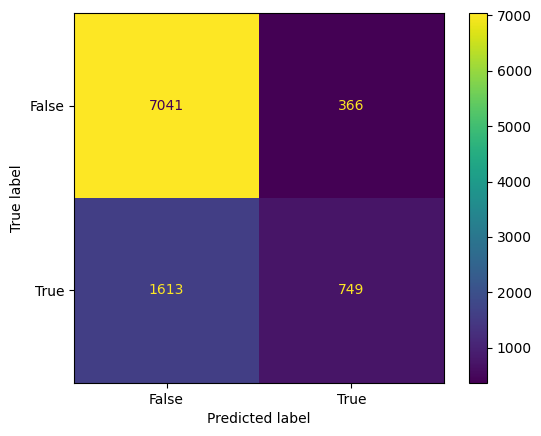

In [9]:
df_model = pd.DataFrame(data={"y_pred":y_pred, "y_true":y_test})
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(gnb,X_test, y_test)

Przprowadź uczenie klasyfikatora dla kolumn *race* i *native_country*. Podaj dokładnosć modeli i macierze błędu wraz z ich wykresami i interpretacją. Przedstaw wnioski od czego zależą otrzymane wyniki

In [11]:
X = df[["race", "native_country"]]
y = df["more_than_50k"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
cols=['race','native_country']

encoder = ce.OneHotEncoder(cols=cols)
X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)

gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)

/Users/dominikmatracki/MyProjects/AnalizaBazyDanych/venv/lib/python3.9/site-packages/category_encoders/one_hot.py:145: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for cat_name, class_ in values.iteritems():
/Users/dominikmatracki/MyProjects/AnalizaBazyDanych/venv/lib/python3.9/site-packages/category_encoders/one_hot.py:145: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for cat_name, class_ in values.iteritems():


/Users/dominikmatracki/MyProjects/AnalizaBazyDanych/venv/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


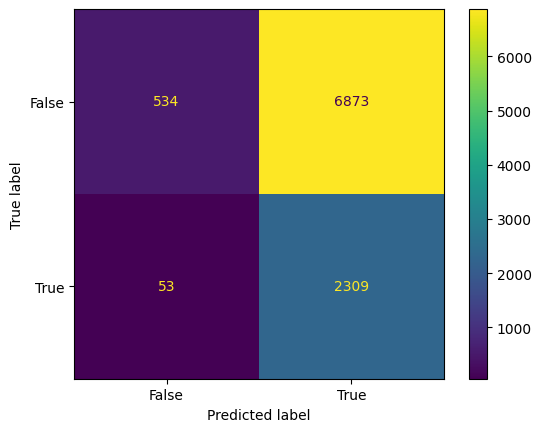

In [12]:
df_model = pd.DataFrame(data={"y_pred":y_pred, "y_true":y_test})
plot_confusion_matrix(gnb,X_test, y_test)

## Wnioski

Pierwszy model ma tendencje do wykazywania tkz. "false positives". Natomiast drugi model ma tendencje z kolei do false negatives. Trenujac model drugi nie wszystkie dane obecne w zbiorze poczatkowym wplywaja pozytywnie na wyniki modelu.